In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")

In [2]:
df_agility = pd.read_csv("./data/6_DATA_AGILITY_CATEGORIAS.csv")

In [4]:
df_agility.drop(columns = ["Unnamed: 0"], inplace = True)

In [6]:
df_agility["Categoria"].value_counts()

Categoria
L     10755
M      7252
S      6861
I      4554
XS     3189
Name: count, dtype: int64

In [5]:
df_agility_l = df_agility[df_agility["Categoria"] == "L"]
df_agility_i = df_agility[df_agility["Categoria"] == "I"]
df_agility_m = df_agility[df_agility["Categoria"] == "M"]
df_agility_s = df_agility[df_agility["Categoria"] == "S"]
df_agility_xs = df_agility[df_agility["Categoria"] == "XS"]

In [7]:
def top10 (data,categoria):
    dic_elim = {
        "pistas_a_0" : [],
        "eliminados" : []
    }

    for raza in data.index:
        elim_x_raza = df_agility[df_agility["Categoria"] == categoria].groupby(df_agility["Breed"] == raza)["Eliminados"].value_counts()
        for a,b in elim_x_raza.items():
            if a == (True, 'EXC_0'):
                dic_elim["pistas_a_0"].append(b)
            if a == (True, 'ELIM'):
                dic_elim["eliminados"].append(b)
    
    data["pistas_a_0"] = dic_elim["pistas_a_0"]
    data["eliminados"] = dic_elim["eliminados"]
    data["%Pisats_a_0"] =  round(data["pistas_a_0"] / data["count"] *100, 2)
    data["%eliminados"] =  round(data["eliminados"] / data["count"] *100, 2)
    return data

In [16]:
def fig_TOP_10 (data, categoria):
    sns.barplot(y= data.index, x= data.values, hue= data.values, legend=False, palette= "tab20b")
    plt.title(f"Top 10 razas {categoria}")
    plt.ylabel("")
    plt.xlabel(f"{data.values.sum()} perros")
    plt.xticks([])
    sns.despine(left=True, bottom=True)

    for i, valor in enumerate(data.values):
        plt.text(valor, i, str(valor), ha='left', va='center')

In [63]:
def fig_a_cero (data, categoria):

    a_cero_relativo = data.sort_values(by="%Pisats_a_0", ascending=False)

    sns.barplot(y= a_cero_relativo.index, x= a_cero_relativo["%Pisats_a_0"], hue= a_cero_relativo["%Pisats_a_0"], legend=False, palette= "tab20b")
    plt.xlim(0,100)
    plt.title("Probabilidad de pista a cero")
    plt.ylabel(categoria)
    plt.xlabel("")
    plt.xticks([])
    sns.despine(left=True, bottom=True)

    for i, valor in enumerate(a_cero_relativo["%Pisats_a_0"]):
        plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

In [64]:
def fig_elim (data, categoria):

    eliminados_relativo = data.sort_values(by="%eliminados", ascending=True)

    sns.barplot(y= eliminados_relativo.index, x= eliminados_relativo["%eliminados"], hue= eliminados_relativo["%eliminados"], legend=False, palette= "tab20b")
    plt.xlim(0,100)
    plt.title("Probabilidad de Eliminado")
    plt.ylabel(categoria)
    plt.xlabel("")
    plt.xticks([])
    sns.despine(left=True, bottom=True)

    for i, valor in enumerate(eliminados_relativo["%eliminados"]):
        plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

In [27]:
razas_10L = df_agility_l["Breed"].value_counts()[:10]

top_razas_10L = pd.DataFrame(razas_10L)

df_top_10L = top10(top_razas_10L, "L")
df_top_10L


,count,pistas_a_0,eliminados,%Pisats_a_0,%eliminados
Breed,,,,,
Border Collie,7654,2987,1588,39.03,20.75
Mixed breed,935,360,149,38.50,15.94
Belgian Shepherd Dog,865,264,192,30.52,22.20
German Shepherd Dog,145,28,27,19.31,18.62
Australian Kelpie,143,66,25,46.15,17.48
Golden Retriever,114,37,16,32.46,14.04
Spanish Water Dog,110,51,21,46.36,19.09
Australian Shepherd,102,14,33,13.73,32.35
Leonese Shepherd,86,38,16,44.19,18.60


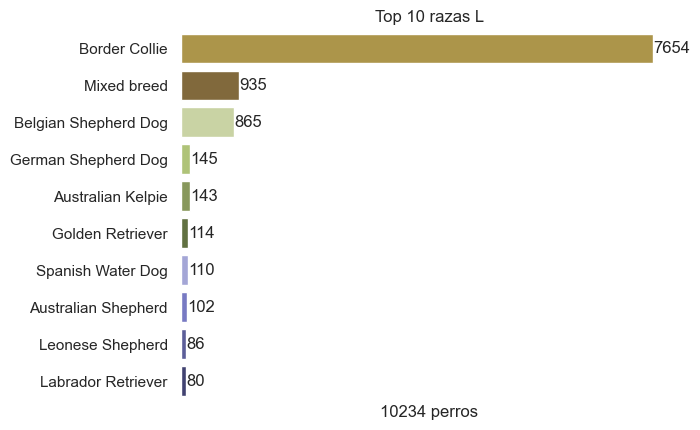

In [75]:
fig_TOP_10 (razas_10L, "L")
#plt.savefig('./img/L_top10.png', bbox_inches='tight')

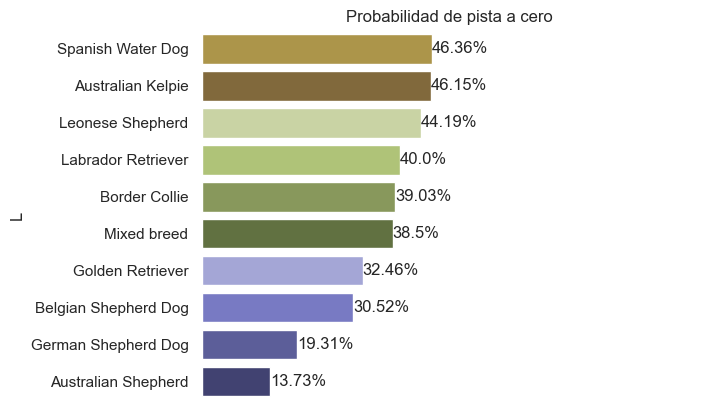

In [76]:
df_top_l = top10(top_razas_10L, "L")
fig_a_cero(df_top_l, "L")
#plt.savefig('./img/L_top10_a0.png', bbox_inches='tight')

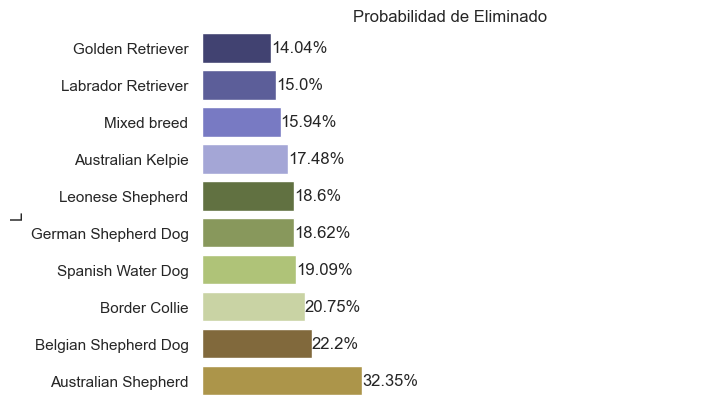

In [77]:
fig_elim(df_top_l, "L")
#plt.savefig('./img/L_top10_elim.png', bbox_inches='tight')

In [9]:
razas_10I = df_agility_i["Breed"].value_counts()[:10]

top_razas_10I = pd.DataFrame(razas_10I)

top10(top_razas_10I, "I")


,count,pistas_a_0,eliminados,%Pisats_a_0,%eliminados
Breed,,,,,
Border Collie,3034,979,935,32.27,30.82
Spanish Water Dog,522,198,148,37.93,28.35
Mixed breed,292,104,77,35.62,26.37
Australian Kelpie,95,20,54,21.05,56.84
Mini American Shepherd,92,23,20,25.00,21.74
Australian Shepherd,87,17,27,19.54,31.03
Bearded Collie,48,14,8,29.17,16.67
Schnauzer,41,3,24,7.32,58.54
Leonese Shepherd,37,9,9,24.32,24.32


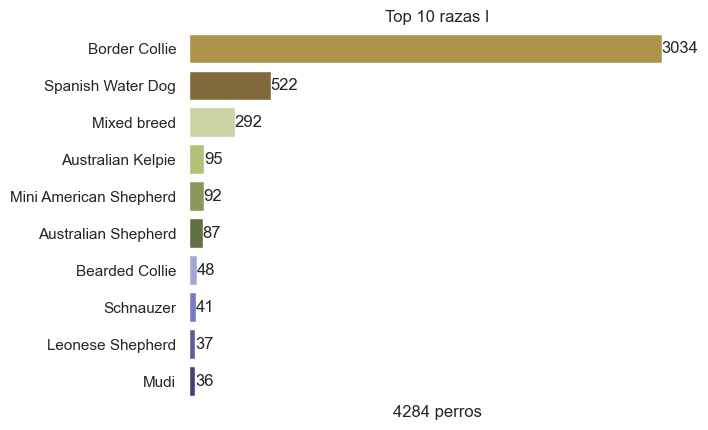

In [78]:
fig_TOP_10 (razas_10I, "I")
#plt.savefig('./img/I_top10.png', bbox_inches='tight')

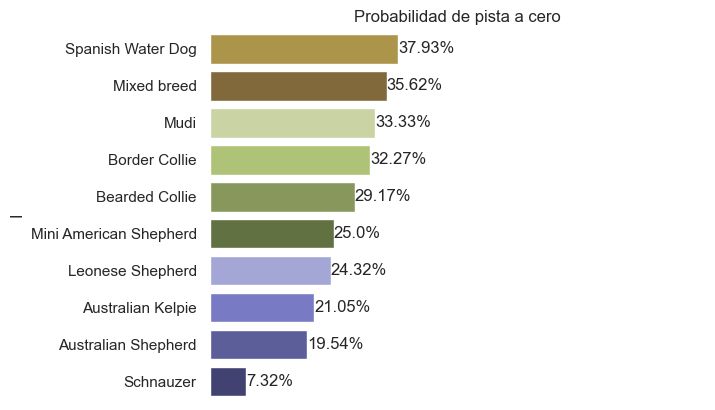

In [79]:

df_top_i = top10(top_razas_10I, "I")
fig_a_cero(df_top_i, "I")
#plt.savefig('./img/I_top10_a0.png', bbox_inches='tight')

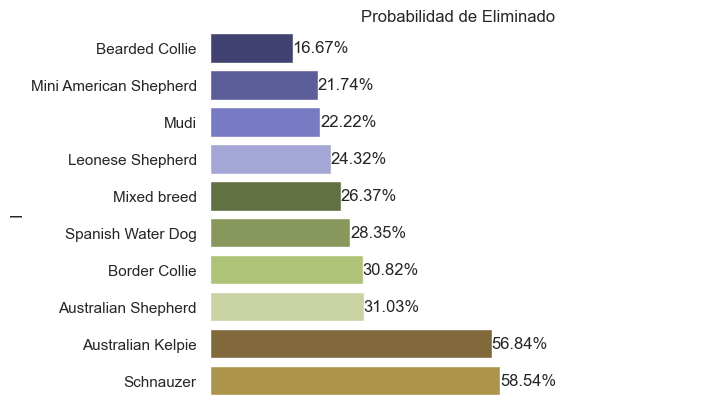

In [80]:
fig_elim(df_top_i, "I")
plt.savefig('./img/I_top10_elim.png', bbox_inches='tight')

In [10]:
razas_10M = df_agility_m["Breed"].value_counts()[:10]

top_razas_10M = pd.DataFrame(razas_10M)

top10(top_razas_10M, "M")


,count,pistas_a_0,eliminados,%Pisats_a_0,%eliminados
Breed,,,,,
Shetland Sheepdog,2133,784,604,36.76,28.32
Spanish Water Dog,1167,431,346,36.93,29.65
English Cocker Spaniel,847,320,327,37.78,38.61
Mixed breed,715,187,261,26.15,36.50
Border Collie,565,177,197,31.33,34.87
Mudi,434,160,147,36.87,33.87
Parson Russell Terrier,157,57,47,36.31,29.94
Beagle,138,56,27,40.58,19.57
Mini American Shepherd,129,35,66,27.13,51.16


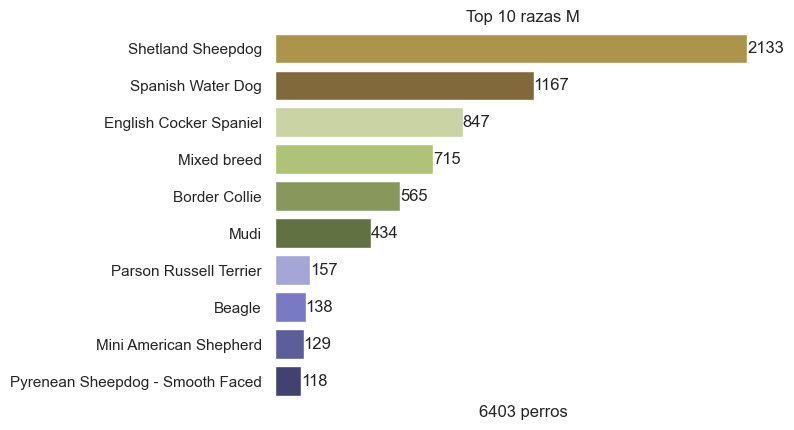

In [81]:
fig_TOP_10 (razas_10M, "M")
#plt.savefig('./img/M_top10.png', bbox_inches='tight')

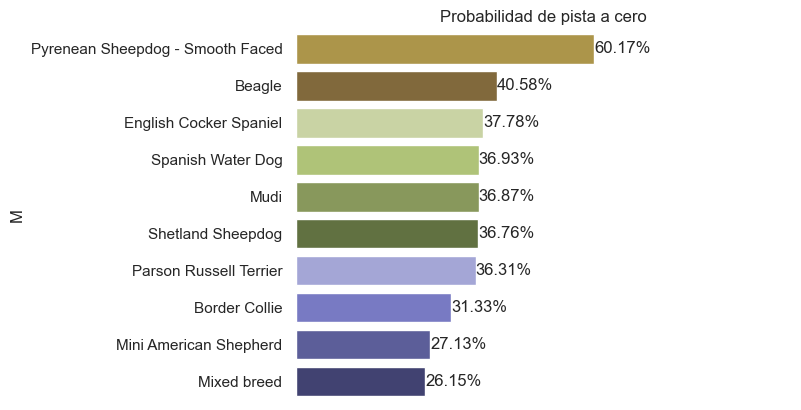

In [82]:
df_top_m = top10(top_razas_10M, "M")
fig_a_cero(df_top_m, "M")
#plt.savefig('./img/M_top10_a0.png', bbox_inches='tight')

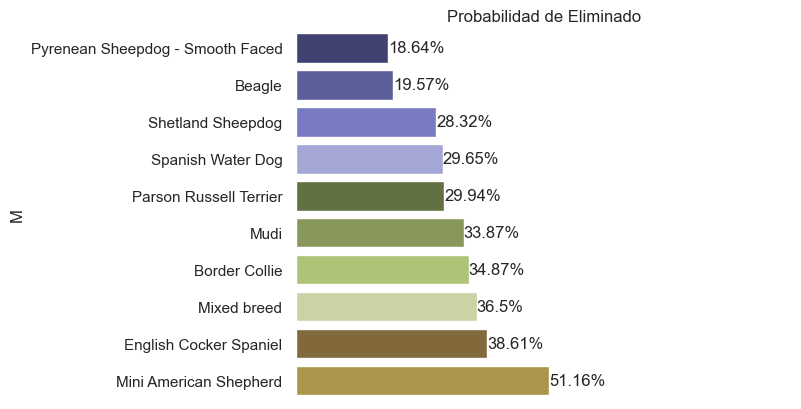

In [83]:
fig_elim(df_top_m, "M")
#plt.savefig('./img/M_top10_elim.png', bbox_inches='tight')

In [11]:
razas_10S = df_agility_s["Breed"].value_counts()[:10]

top_razas_10S = pd.DataFrame(razas_10S)

top10(top_razas_10S, "S")

,count,pistas_a_0,eliminados,%Pisats_a_0,%eliminados
Breed,,,,,
Shetland Sheepdog,2144,804,696,37.50,32.46
Poodle,840,360,241,42.86,28.69
Mixed breed,541,135,230,24.95,42.51
Parson Russell Terrier,517,196,176,37.91,34.04
English Cocker Spaniel,510,194,184,38.04,36.08
Jack Russell Terrier,487,140,128,28.75,26.28
Continental Toy Spaniel,305,134,93,43.93,30.49
Schnauzer,275,140,49,50.91,17.82
Miniature Pinscher,274,131,48,47.81,17.52


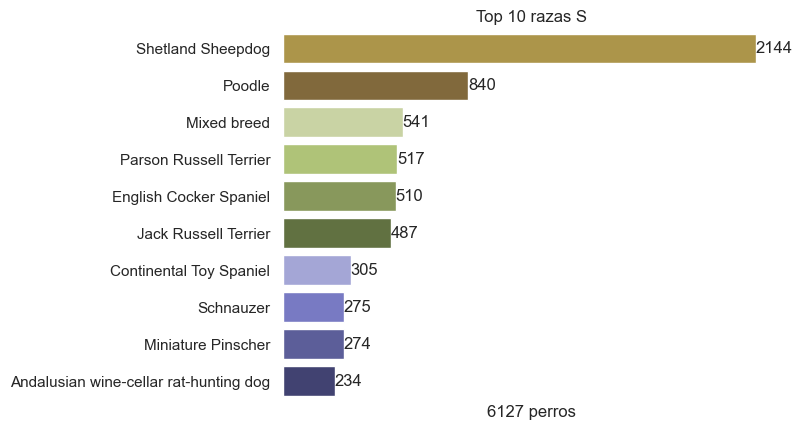

In [84]:
fig_TOP_10 (razas_10S, "S")
#plt.savefig('./img/S_top10.png', bbox_inches='tight')

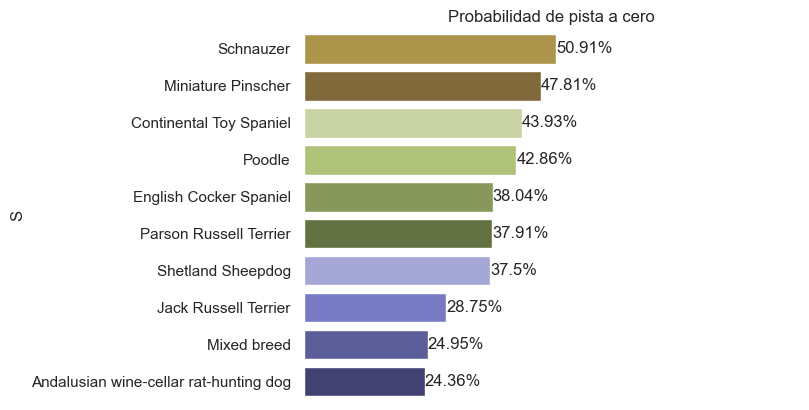

In [85]:
df_top_s = top10(top_razas_10S, "S")
fig_a_cero(df_top_s, "S")
#plt.savefig('./img/S_top10_a0.png', bbox_inches='tight')

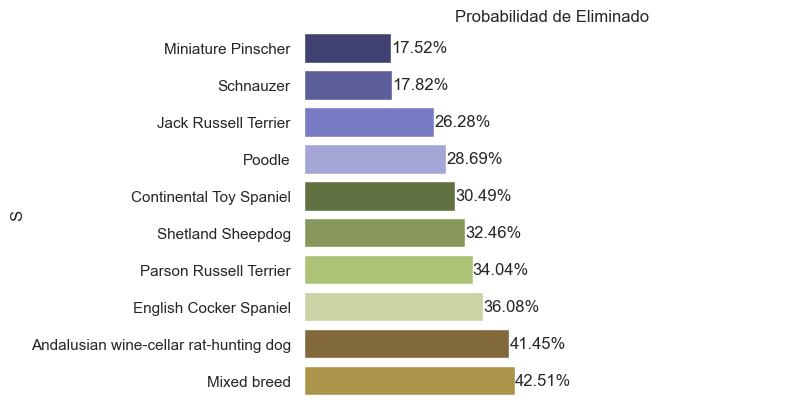

In [86]:
fig_elim(df_top_s, "S")
#plt.savefig('./img/S_top10_elim.png', bbox_inches='tight')

In [12]:
razas_10XS = df_agility_xs["Breed"].value_counts()[:10]

top_razas_10XS = pd.DataFrame(razas_10XS)

top10(top_razas_10XS, "XS")

,count,pistas_a_0,eliminados,%Pisats_a_0,%eliminados
Breed,,,,,
Poodle,705,360,200,51.06,28.37
Jack Russell Terrier,577,213,201,36.92,34.84
Mixed breed,560,115,233,20.54,41.61
German Spitz,245,114,68,46.53,27.76
Chihuahua,184,81,60,44.02,32.61
Continental Toy Spaniel,179,39,94,21.79,52.51
Miniature Pinscher,145,68,46,46.90,31.72
Shetland Sheepdog,137,37,72,27.01,52.55
Bichon Frise,110,45,26,40.91,23.64


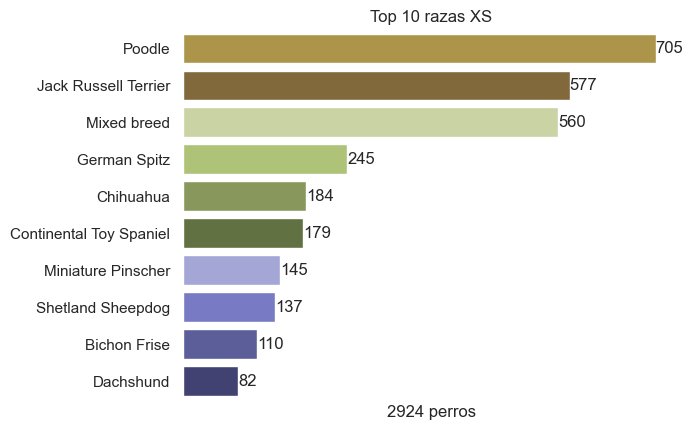

In [87]:
fig_TOP_10 (razas_10XS, "XS")
#plt.savefig('./img/XS_top10.png', bbox_inches='tight')

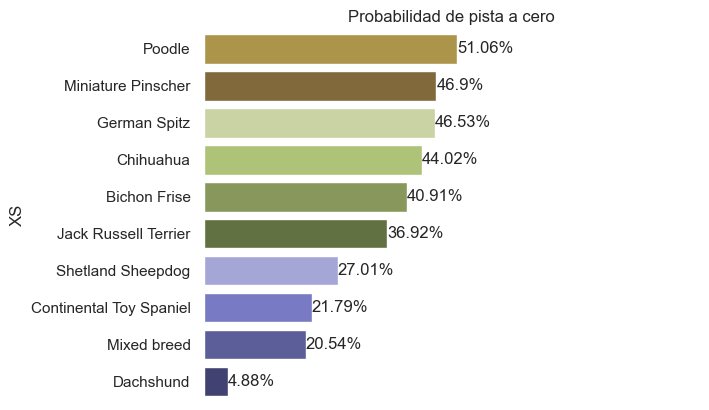

In [88]:
df_top_xs = top10(top_razas_10XS, "XS")
fig_a_cero(df_top_xs, "XS")
#plt.savefig('./img/XS_top10_a0.png', bbox_inches='tight')

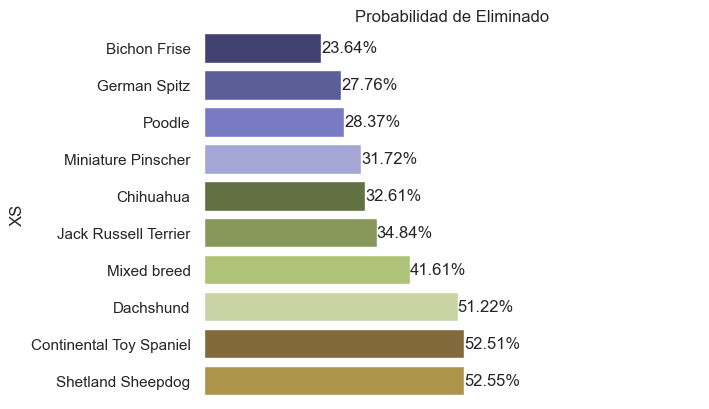

In [89]:
fig_elim(df_top_xs, "XS")
#plt.savefig('./img/XS_top10_elim.png', bbox_inches='tight')